In [2]:
# Install imageio for creating animations.  
!pip -q install imageio
!pip -q install scikit-image
!pip install -q git+https://github.com/tensorflow/docs

In [3]:
import tensorflow_hub as hub

progan = hub.load("https://tfhub.dev/google/progan-128/1").signatures['default']


In [22]:
from absl import logging
from PIL import Image

import imageio
import PIL.Image
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf
tf.random.set_seed(0)

import tensorflow_hub as hub
from tensorflow_docs.vis import embed
import time

try:
    from google.colab import files
except ImportError:
    pass

from IPython import display
from skimage import transform

# We could retrieve this value from module.get_input_shapes() if we didn't know
# beforehand which module we will be using.
latent_dim = 512


# Interpolates between two vectors that are non-zero and don't both lie on a
# line going through origin. First normalizes v2 to have the same norm as v1. 
# Then interpolates between the two vectors on the hypersphere.
def interpolate_hypersphere(v1, v2, num_steps):
    v1_norm = tf.norm(v1)
    v2_norm = tf.norm(v2)
    v2_normalized = v2 * (v1_norm / v2_norm)

    vectors = []
    for step in range(num_steps):
        interpolated = v1 + (v2_normalized - v1) * step / (num_steps - 1)
        interpolated_norm = tf.norm(interpolated)
        interpolated_normalized = interpolated * (v1_norm / interpolated_norm)
        vectors.append(interpolated_normalized)
    return tf.stack(vectors)

# Simple way to display an image.
def display_image(image):
    image = tf.constant(image)
    image = tf.image.convert_image_dtype(image, tf.uint8)
    return PIL.Image.fromarray(image.numpy())

# Given a set of images, show an animation.
def animate(images):
    images = np.array(images)
    converted_images = np.clip(images * 255, 0, 255).astype(np.uint8)
    imageio.mimsave('./animation.gif', converted_images)
    return embed.embed_file('./animation.gif')

logging.set_verbosity(logging.ERROR)

In [5]:
import os
print(os.getcwd())



/Users/xuxuqian/Documents/MSc-Coding-2-master/Week-7-notebooks


In [21]:
image = Image.open("/Users/xuxuqian/Desktop/000025.jpg")
image = image.resize((128, 128))


In [7]:
image_array = np.array(image) / 255.0


In [8]:
image_tensor = tf.convert_to_tensor(image_array)
image_tensor = tf.reshape(image_tensor, [1, 128, 128, 3])

In [9]:
image_tensor = tf.cast(image_tensor, dtype=tf.float32)

generated_image = progan(image_tensor)['default']





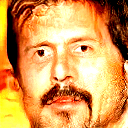

In [24]:
def interpolate_between_vectors():
    v1 = tf.random.normal([latent_dim])
    v2 = tf.random.normal([latent_dim])
    
  # Creates a tensor with 25 steps of interpolation between v1 and v2.
    vectors = interpolate_hypersphere(v1, v2, 50)

  # Uses module to generate images from the latent space.
    interpolated_images = progan(vectors)['default']

    return interpolated_images

interpolated_images = interpolate_between_vectors()
animate(interpolated_images)